$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Unsupervised Learning


### ITCS 5156
### Minwoo "Jake" Lee

<br/>
<font color="blue"><b>

NAME: Carter Gray

</b> </font>

# Goal

The goal of this activity is to practice clustering and dimensionality reduction with the previously used Iris classification data, [Iris](https://archive.ics.uci.edu/ml/datasets/iris). Follow the TODO titles and comments to finish the activity! 

# Agenda

* Loading Iris data from Scikit-Learn
* Visualize Iris data
* Clustering
  * k-means
  * Mean Shift
  * Agglomerative Clustering

* Dimensionality Reduction
  * PCA
  * LDA
  * tSNE

# Tables of TODO's


1. [TODO1 (5 points)](#TODO1) 
2. [TODO2 (10 points)](#TODO2) 
3. [TODO3 (7 points)](#TODO3) 
4. [TODO4 (5 points)](#TODO4)  
5. [TODO5 (6 points)](#TODO5) 
6. [TODO6 (5 points)](#TODO6) 
7. [TODO7 (7 points)](#TODO7) 
8. [TODO8 (5 points)](#TODO8) 
9. [TODO9 (5 points)](#TODO9) 
10. [TODO10 (8 points)](#TODO10) 
11. [TODO11 (5 points)](#TODO11) 
12. [TODO12 (5 points)](#TODO12) 
13. [TODO13 (5 points)](#TODO13) 
14. [TODO14 (5 points)](#TODO14) 
15. [TODO15 (15 points)](#TODO14) 
18. [Feedback (2 points)](#TODO18) 


Well, let us start the lab with importing the common libraries first. 

In [ ]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import seaborn as sns

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


# Loading Iris data from Scikit-Learn

Just like previously in the semester, let's load the Iris data via Scikit. The `load_iris()` function will load our Iris data and metadata. Here we only want to extract the data and targets using `iris.data` and `iris.target`.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X = iris.data
T = iris.target
print("X (data) shape: {}".format(X.shape))
print("T (labels) shape: {}".format(X.shape))

X (data) shape: (150, 4)
T (labels) shape: (150, 4)


Wait. Do we need `T` here? Nope! We are doing "Unsupervised" Learning. So, forget about `T` for a while. 

# Visualize Iris data

Here we provide a quick visualization we used prior in the semester. You should be able to  observe the three flower clusters for each of the feature graphs. Recall that the Iris data has 4 features 'Sepal length', 'Sepal width', 'Petal length', and 'Petal width'

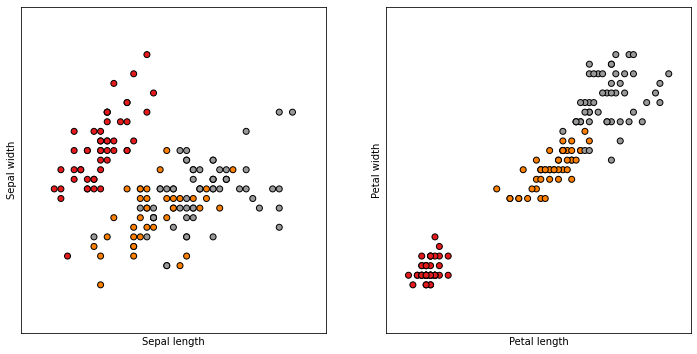

In [ ]:
#http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# modified by JML

plt.figure(figsize=(12,6))
for i in range(2):
    x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
    y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

    plt.subplot(1,2,i+1)
    # Plot the training points
    plt.scatter(X[:, 2*i], X[:, 2*i+1], c=T, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length' if i==0 else 'Petal length')
    plt.ylabel('Sepal width'  if i==0 else 'Petal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())


# k-Means

OK. Let us cluster the data and see how each algorithm groups the iris data. 

<div id="TODO1"></div>

### TODO1 (5 points)

1. Import, then create a `KMeans` object instance for **two** clusters. Store it to `kmeans`. 
2. Train the model on the Iris data `X`. 
3. Print out the cluster `labels_` and `cluster_centers_`. 

Remember we do **NOT** use the labels for training as it is **unsupervised** learning!

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
print(kmeans.cluster_centers_)

[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


The two centers can be prsented neatly with DataFramwe as follows. 

In [ ]:
human_mus  = pd.DataFrame(kmeans.cluster_centers_, columns=iris.feature_names)
human_mus.index = ['cluster {} means'.format(k+1) for k in range(len(human_mus))]
human_mus

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster 1 means,5.005660,3.369811,1.560377,0.290566
cluster 2 means,6.301031,2.886598,4.958763,1.695876


## Visualize Results

Let us visualize the feature means for each cluster, as given below. We can think about the means as x-y coordinates if we pair like features. For example, the 'sepal length' mean could be the x-value and the 'sepal width' mean could be the y-value. Likewise, the 'petal length' mean could be the x-value and the 'petal width' mean could be the y-value. This idea will be useful when plotting the center of the clusters later on!


<div id="TODO2"></div>

### TODO2 (10 points)

Complete the `plot_iris_cluster` that produce two scatter plots, one for sepal length and with and the other for petal length and width.   
1. `scatter` plot the data points with different colors using the label `y`. 
   HINT: you can use column index increment by 2. Refer to the figure above. 
2. Add a marker (using a scatter plot format option'o') to show the centroids using the  varaible containing our means `mu`. You can change marker size to make it bigger if you so choose. 
3. Using the `plot_iris_cluster`, visualize the clustering results. 
4. What do you think about the results?

In [ ]:
def plot_iris_cluster(X, y, mu, dim=2):
    """
        Plot the Itis data with based on passed labels
        
        Args:
            X (np.ndarray): Data formatted as a NumPy array
            y (np.ndarray): Vector of labels to plot each cluster.
            m (float): The center of each cluster
            dim (int): option to plot multidimensional figures (for sepal and petal)
    """

    k = len(np.unique(y)) # mu.shape[0]
    plt.figure(figsize=(12,6))
    for i in range(dim):
        x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
        y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

        plt.subplot(1,2,i+1)
        # TODO 1: Plot the training points
        plt.scatter(X[:, 2*i], X[:, 2*i+1], c=y, cmap=plt.cm.Set1, edgecolor='k')
        
        
        # plot the center
        if mu is not None:
            # TODO 2
          plt.plot(mu[:, 2*i], mu[:, 2*i+1],'o')
            
            
        plt.xlabel('Sepal length' if i==0 else 'Petal length')
        plt.ylabel('Sepal width'  if i==0 else 'Petal width')

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

Below we plot the predicted clusters. Recall above that we talked about pairing the learned means to get x-y coordinates. If you look closely you can see these pairings or centers of the clusters represented by colored squares.


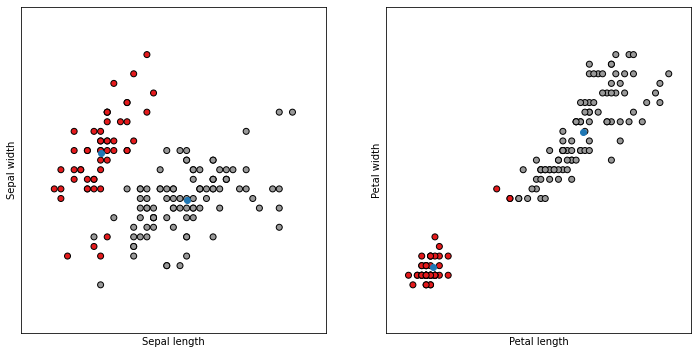

In [ ]:
# TODO 3
plot_iris_cluster(X, kmeans.labels_, kmeans.cluster_centers_)


`TODO 2.4` How do you think the k-means clustering algorithm preformed? 

`ANSWER` It seems like the classification went well, the centers are in the middle of the clusters



<div id="TODO3"></div>

### TODO3 (7 points)

Let's try using different amounts of clusters now and then observe what happens to our plots.


1. Run k-Means algoriithm with **5** clusters. 

2. Run k-Means algoriithm **3** clusters. 

3. State your thoughts about the results. 

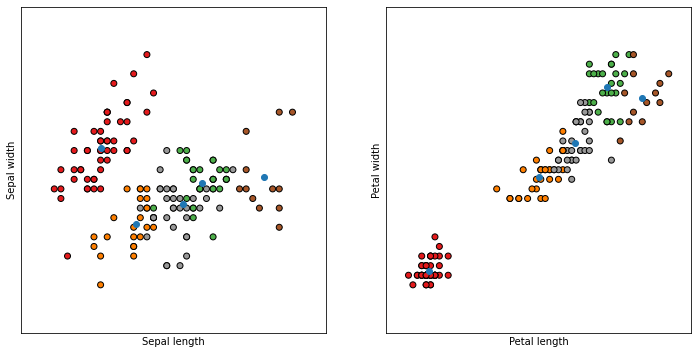

In [ ]:
#TODO 1
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
plot_iris_cluster(X, kmeans.labels_, kmeans.cluster_centers_)



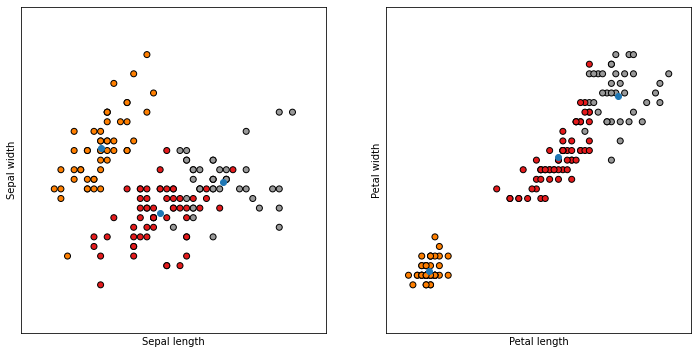

In [ ]:
# TODO 2
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
plot_iris_cluster(X, kmeans.labels_, kmeans.cluster_centers_)



`TODO3.3` What do you think about the results of k-Means? What number of clusters (2,3, or 5) do you think works best? Why? 

`ANSWER` It looks like 2 clusters works the best, the 3 clusters has too much bleeding





<div id="TODO4"></div>

### TODO4 (5 points)

As we know the number of classes in the data is three, let's see how our original labels and predicted clustered labels match up. 


1. Plot by using the `plot_iris_cluster()` function. Instead of using the predicted clustered labels `lables_` use our true labels `T`. 
    1. Hint: You must also pass the learned centers and our data `X`  

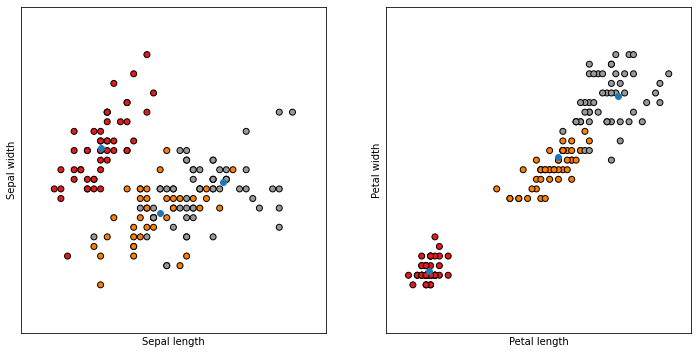

In [ ]:
#TODO (1)
plot_iris_cluster(X, T, kmeans.cluster_centers_)


Take second to observe where the centers of each of the three clusters are? Are they close to their true label clusterings?

Below we compute the actual accuracy and further visualize our mislabeled data.

In [ ]:
acc = np.sum(kmeans.labels_==T)/X.shape[0]
print("k-means accuracy: {:.5f}".format(acc))

k-means accuracy: 0.24000


Hold on. The accuracy is not good as we observed in the figure. Why? Let us see what happend. 

<div id="TODO5"></div>

### TODO5 (6 points)

1. Plot `T` with red circle markers.
2. Plot the clustering labels with blue cross markers and see how it differs.
3. Did you find the reason why the accuracy is low? Explain what you discovered. If your results are good, you can state that as well. 

NOTE: The output figure and the accuracy above can be differnt in your run. You can write the answer based on YOUR observation after reproducing the output. The output here is to show what kind of figure you will see. 

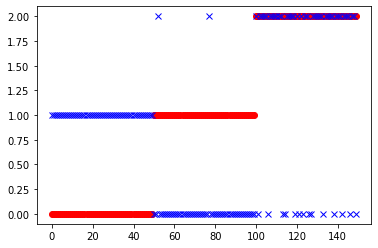

In [ ]:
plt.plot(T,'ro')
plt.plot(kmeans.labels_,'bx')



`TODO5.3` Explain what you have observed from the figure? Can you explain how/why it works or it does not work? 

`ANSWER` The 2.0 seems to have the best accuracy, the 1.0 and 0.0 are classified poorly. 




# Mean Shift

Mean Shift does not need to predetermine the number of clusters. Let us see how MS clusters the same data.

<div id="TODO6"></div>

### TODO6 (5 points)

1. Create a `MeanShift` instance and store it to `ms`.
2. Train the model `ms`.
3. Plot the clustering results using `plot_iris_cluster`. 

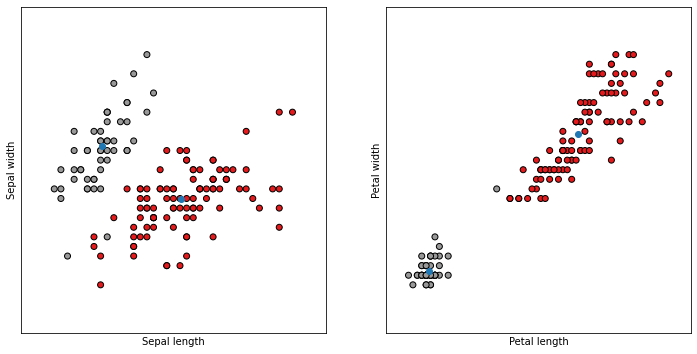

In [ ]:
from sklearn.cluster import MeanShift
ms = MeanShift().fit(X)
plot_iris_cluster(X,ms.labels_,ms.cluster_centers_)




<div id="TODO7"></div>

### TODO7 (7 points)

1. Train `ms` with last two columns of data `X` and plot the clustering results using  `plot_iris_cluster`. 
2. Train `ms` with first two columns of data `X` and plot the clustering results using  `plot_iris_cluster`. 
3. Do you observe any difference between the choice of features fo the training data? 

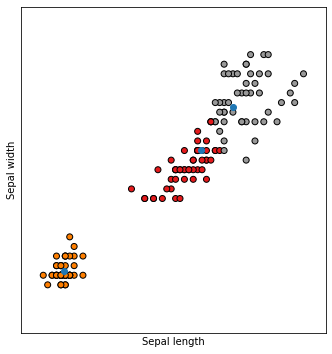

In [ ]:
# TODO 1
ms = MeanShift().fit(X[:,2:])


plot_iris_cluster(X[:,2:],ms.labels_,ms.cluster_centers_,1)


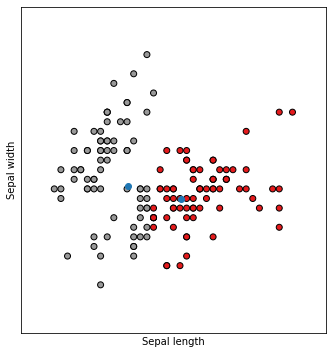

In [ ]:
# TODO 2

ms = MeanShift().fit(X[:,:2])
plot_iris_cluster(X,ms.labels_,ms.cluster_centers_,1)


`TODO7.3` Do you observe any difference between the choice of features fo the training data? 

`ANSWER` The last 2 seem to cluster better




## Agglomerative Clustering

Now, let us see how we cluster the data in a holistic way. Again, we do not need to know how many clusters there are.

<div id="TODO8"></div>

### TODO8 (5 points)

1. Create a `AgglomerativeClustering` instance with `distance_threshold` to be zero and `n_clusters` to be None. Store the instance to `agg`. 
2. Train `agg`.
3. Plot the clustering results using `plot_iris_cluster` function. 

Number of Clusters:  150


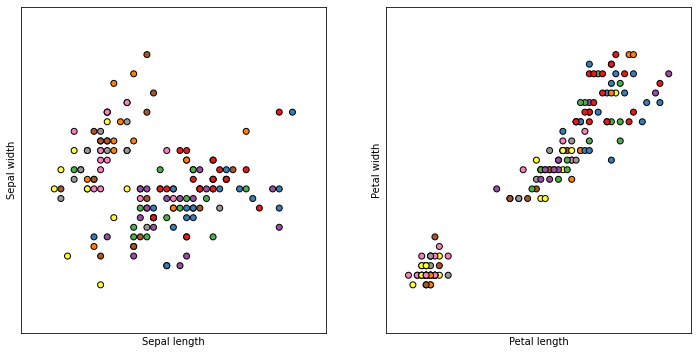

In [ ]:
# import
from sklearn.cluster import AgglomerativeClustering

# TODO 1
agg = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
# TODO 2
agg.fit(X)
# TODO 3
plot_iris_cluster(X,agg.labels_,None)

# print the number of clusters
print("Number of Clusters: ", agg.n_clusters_)

As expected, we have all the individual data samples are their own clusters, so the number of clusters is equal to the number of data samples because of 0 distance threshold. Now, let us create the dendrogram to see how the threshold affects the clusters. Here is the code from scikit-learn to draw a dendrogram. 

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

<div id="TODO9"></div>

### TODO9 (5 points)

1. Call the `plot_dendrogram`. 

  HINT: you can refer to the lecture slides to find the way to call the function. 

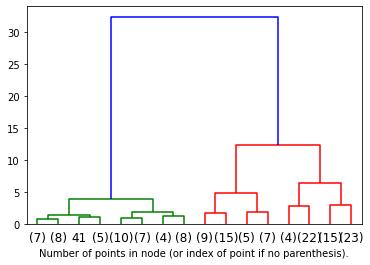

In [ ]:

plot_dendrogram(agg, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<div id="TODO10"></div>

### TODO10 (8 points)

Now we want to see how the actual clustering works when you change the threshold. 

1. Looking at the dendrogram find 5 different threshold that results in different number of clusters (exclude zero). Then, create a list `thresholds` with 5 different threshold values. 
2. Using `set_params` method, change the `distance_threshold` to different value in the loop. 
3. Train `agg` 
4. Plot the clustering results using `plot_iris_cluster`. 

  HINT: you can refer to the lecture slides to find the way to call the function. 

<Figure size 432x288 with 0 Axes>

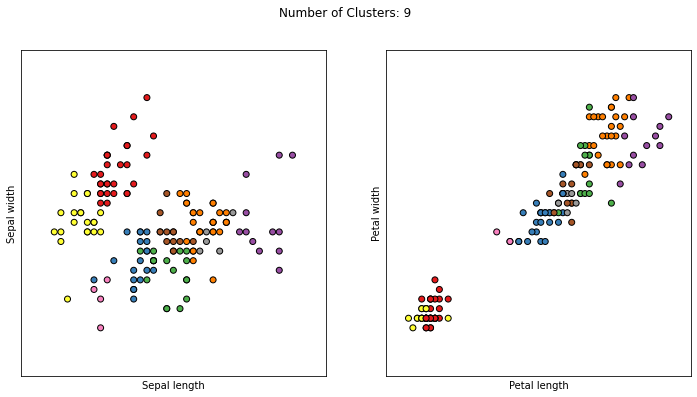

<Figure size 432x288 with 0 Axes>

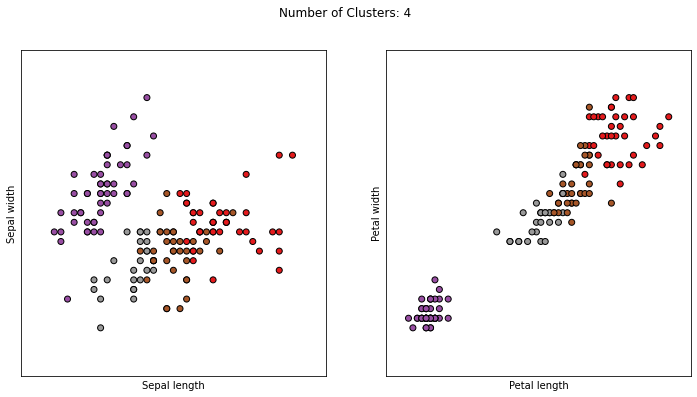

<Figure size 432x288 with 0 Axes>

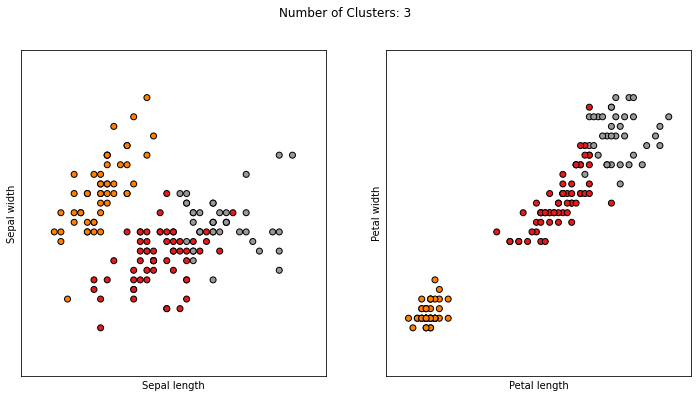

<Figure size 432x288 with 0 Axes>

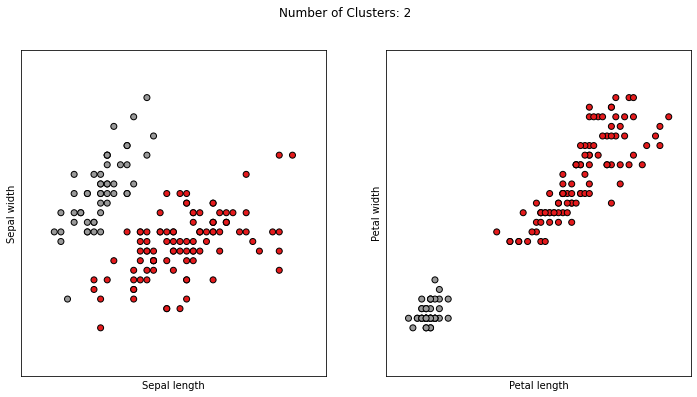

<Figure size 432x288 with 0 Axes>

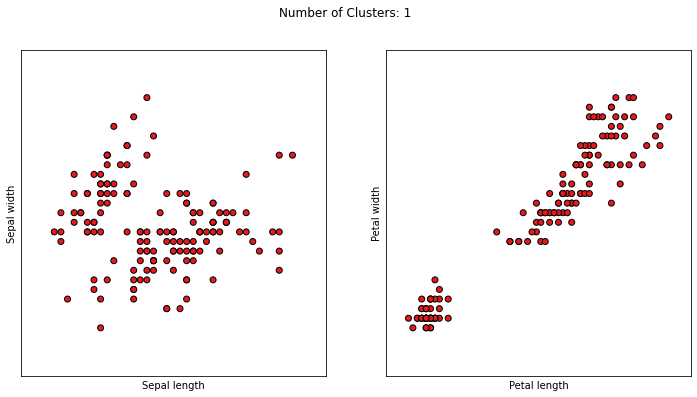

In [ ]:
# TODO 1
thresholds = [2,5,10,15,41]

for thres in thresholds:
    # TODO 2
    agg.set_params(distance_threshold=thres)
    # TODO 3
    agg.fit(X)
    plt.figure()
    # TODO 4
    plot_iris_cluster(X,agg.labels_,None)
    plt.suptitle("Number of Clusters: {}".format(agg.n_clusters_))

## PCA

Pairing our features to form x-y coordinates and the then plotting with two figures makes sense in this case, but not typically. Especially when it is much higher diemensional, it will be much harder to visualize it. Not only for visualization, it won't be easy for machine learning models to develop a good model with a large number of features (it will easily overfit!). To get around this issue, we can reduce the dimensions or features of our data to only consist of the most important dimensions.

Let's practice reducing dimensionality from 4 dimensions (features) to two dimensions so we can have a single 2D plot and only two features to consider while clustering. 

<div id="TODO11"></div>

### TODO11 (5 points)


1. Import `Pipeline`, `StandardScaler`, and `PCA`.
2. Create a `Pipeline` that flows through `StandardScaler` and `PCA`.
  * Here, pass `n_components=4` without reducing the dimensionality.  
  * NOTE: PCA should standardize the input to perform properly!

3. Train the model 
4. print the `explained_variance_ratio_` and `singular_values_`

In [ ]:
# TODO 1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# TODO 2
pca = Pipeline([('scaler',StandardScaler()),('pca', PCA(n_components=4))])

# TODO 3
pca.fit(X)

p = pca.named_steps['pca']

In [ ]:
# TODO 4
p.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [ ]:
# TODO 4
p.singular_values_


array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

Let us see both printouts. We can see the first two components are dominating and the latter two are minimally affecting for explanation/variation of the principal components. Then, we can reduce the dimensionality to two major components. 

<div id="TODO12"></div>

### TODO12 (5 points)

1. Repeat `TODO10.2-3` with the reduced number of components.
2. Using the `transform` method, transform the data `X` into `X_pca`.
3. Plot the transformed `X_pca`.  

In [ ]:
#TODO 1
pca = Pipeline([('scaler',StandardScaler()),('pca', PCA(n_components=2))])

# TODO 3
pca.fit(X)


# TODO 2
X_pca = pca.transform(X)
print(X_pca)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

Text(0, 0.5, 'Second Principal Component')

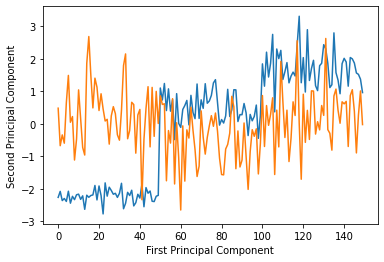

In [ ]:
# TODO 3 
plt.plot(X_pca)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# LDA

Now, let us see how we can use the LDA to reduce the dimensionality and see how it differs from PCA.


<div id="TODO13"></div>

### TODO13 (5 points)

1. Create `LinearDiscriminantAnalysis` instance with 2 components and store it to `lda`.
2. Train the model.
3. Transform `X` into `X_lda`.
4. Plot the data

In [ ]:
# import
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# TODO 1
lda = LinearDiscriminantAnalysis(n_components=2)

# TODO 2
lda.fit(X,T)

# TODO 3
X_lda = lda.transform(X)


Text(0, 0.5, 'Second Principal Component')

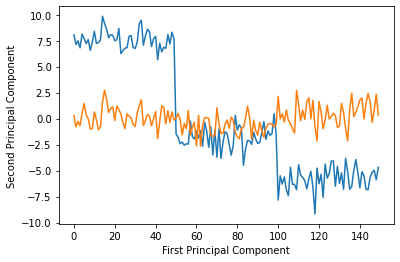

In [ ]:
# TODO 4
plt.plot(X_lda)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



# t-SNE

Let us try one of the most popular manifold learning, t-SNE and how it differently maps the data into lower dimensional space. 


<div id="TODO14"></div>

### TODO14 (5 points)

1. Create `TSNE` instance with 2 components and store it to `tsne`.
2. Train the model `tsne`.
3. Transform `X` into `X_tsne`.
4. Plot the transformed data. 

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


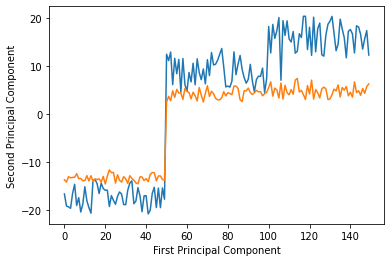

In [ ]:
# Plot the training points
plt.plot(X_tsne)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


## Evaluation

Let us quickly evaluate the clustering performance with some of clustering evaluation metrics.

<div id="TODO15"></div>

### TODO15 (15 points)

0. import clustering metrics, `rand_score`, `homogeneity_score`, `completeness_score`, and `silhouette_score`.
1. Create `KMeans` object with 3 clusters.  
2. For each of the transofrmed data we computed above `X_pca`, `X_lda`, and `X_tsne` do the following steps: 
  1. Train the k-Means model.
  2. Compute the four clustering meterics and add them all to a list called `scores`.
  3. Display the scores using `pd.DataFrame`.
3. How the transofrmed data affect the clustering performance? 

In [ ]:
# TODO 0
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import silhouette_score
# TODO 1
kmeans = KMeans(n_clusters=3, random_state=0)

######################### PCA results
# TODO 2.A
kmeans.fit_predict(X_pca)

# TODO 2.B
scores = [[rand_score(T,kmeans.labels_),
homogeneity_score(T,kmeans.labels_),
completeness_score(T,kmeans.labels_),
silhouette_score(T.reshape(-1,1),kmeans.labels_)]]
# TODO 2.C
pd.DataFrame(scores,columns=['Rand_score','Homogeneity_score','Completeness_score','Silhouette_score'])        


,Rand_score,Homogeneity_score,Completeness_score,Silhouette_score
0,0.832215,0.659127,0.659848,0.551162


In [ ]:
######################### LDA results
# TODO 2.A
kmeans.fit_predict(X_lda)

# TODO 2.B
scores = [[rand_score(T,kmeans.labels_),
homogeneity_score(T,kmeans.labels_),
completeness_score(T,kmeans.labels_),
silhouette_score(T.reshape(-1,1),kmeans.labels_)]]
# TODO 2.C
pd.DataFrame(scores,columns=['Rand_score','Homogeneity_score','Completeness_score','Silhouette_score']) 

,Rand_score,Homogeneity_score,Completeness_score,Silhouette_score
0,0.97396,0.919176,0.919287,0.940261


In [ ]:
######################### t-SNE results
# TODO 2.A
kmeans.fit_predict(X_tsne)

# TODO 2.B
scores = [[rand_score(T,kmeans.labels_),
homogeneity_score(T,kmeans.labels_),
completeness_score(T,kmeans.labels_),
silhouette_score(T.reshape(-1,1),kmeans.labels_)]]
# TODO 2.C
pd.DataFrame(scores,columns=['Rand_score','Homogeneity_score','Completeness_score','Silhouette_score']) 

,Rand_score,Homogeneity_score,Completeness_score,Silhouette_score
0,0.885906,0.769596,0.785902,0.720289


`TODO15.3` How the transofrmed data affect the clustering performance? 

`ANSWER`the transofrmed data improved accuracy in all cases, the lda has the best scores in all of the clustering metrics.



<div id="TODO18"></div>

## Feedback (2 point)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER`5, The clustering metrics were very useful

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER` TODO 12 has a typo

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER`None